<a href="https://www.kaggle.com/code/omarmostafataha/breast-cancer-prediction-f1-0-99-auc-0-99?scriptVersionId=129476691" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <center>Breast Cancer Prediction<center>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


# Data Exploration

In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
df.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.isna().sum() 

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop(columns=['Unnamed: 32','id'],inplace=True)

In [7]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

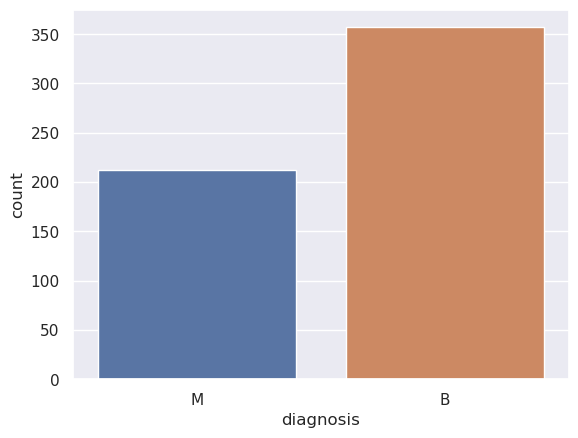

In [8]:
sns.countplot(x=df.diagnosis);

In [9]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Modeling

In [10]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , classification_report , accuracy_score ,precision_recall_curve , roc_curve ,roc_auc_score
from sklearn.preprocessing import StandardScaler

# Logistic Regression (Best Features)

<h2> Feature Selection

In [11]:
#The code in this cell is generated by Chat-GPT

from sklearn.feature_selection import SelectKBest, f_classif
# Separate the features and the target variable
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']
# Use ANOVA F-value as the scoring function for feature selection
selector = SelectKBest(score_func=f_classif, k=15)
# Fit the selector to the data
selector.fit(X, y)
# Get the scores and p-values of each feature
scores = selector.scores_
p_values = selector.pvalues_
# Create a DataFrame to display the scores and p-values of each feature
results = pd.DataFrame({'Feature': X.columns, 'Score': scores, 'p-value': p_values})
results.sort_values(by='Score', ascending=False, inplace=True)
# Select the top K features based on the scores
top_features = X.columns[selector.get_support()]
# Display the top features
print(top_features)

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
       'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')


In [12]:
top_features = list(top_features)
df_top = df[top_features+['diagnosis']]
df_top.sample()

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,diagnosis
126,13.61,87.76,572.6,0.07862,0.05285,0.03085,0.231,1.752,19.83,16.89,113.2,848.7,0.2884,0.3796,0.1329,1


<h2> Multicollinearity

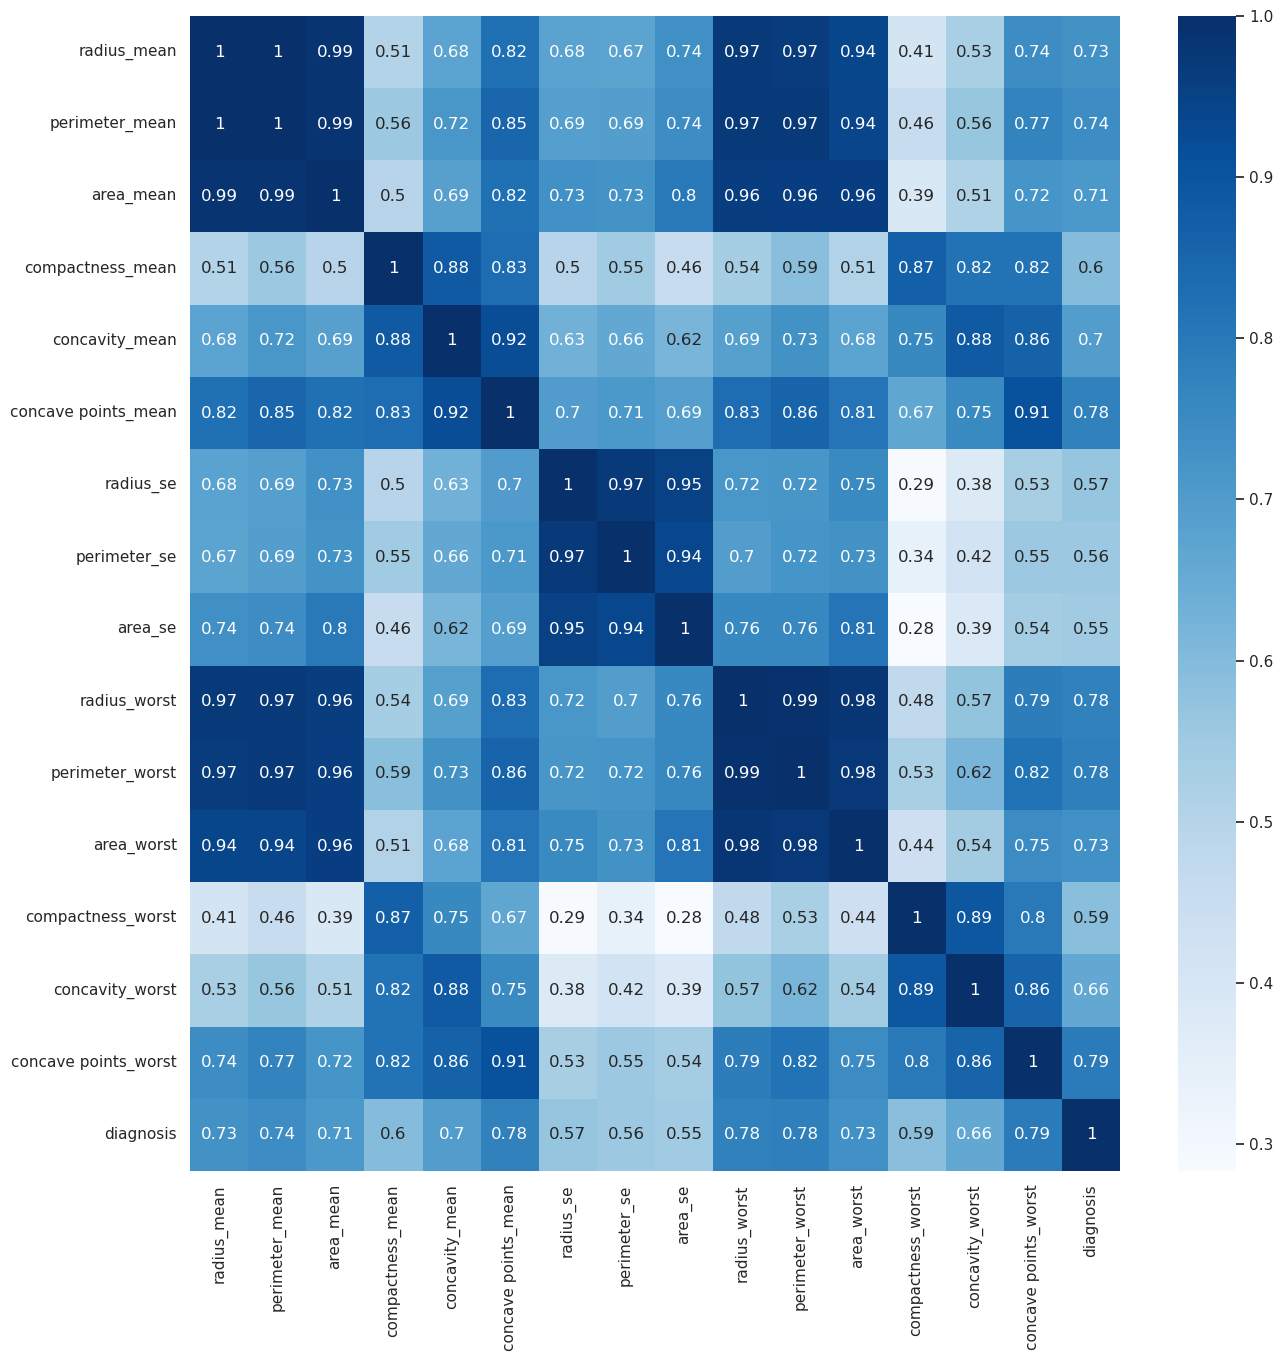

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(df_top.corr(),cmap="Blues",annot=True);

In [14]:
df_top.drop(columns=['radius_mean','perimeter_mean','radius_worst','perimeter_worst'],inplace = True);

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


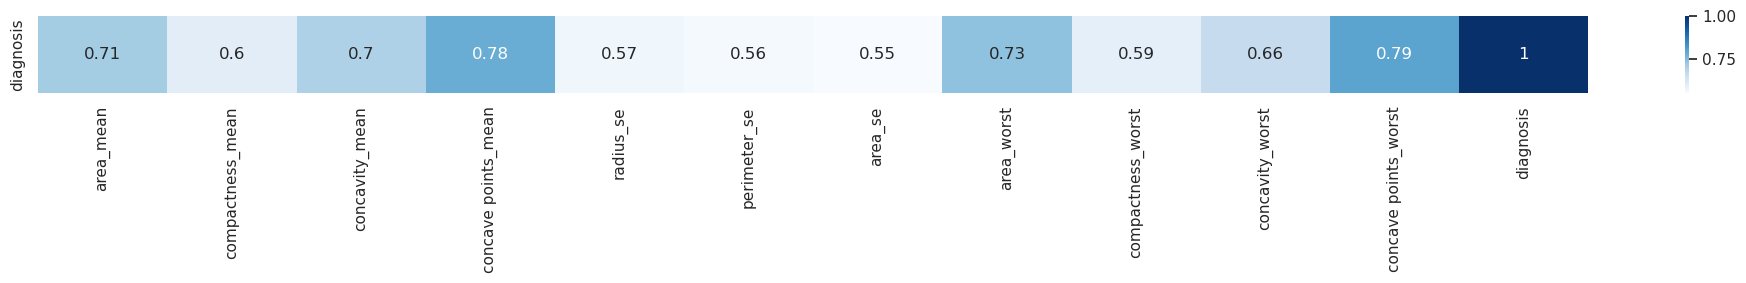

In [15]:
plt.figure(figsize=(25,1))
corr_target = df_top.corr()['diagnosis'].to_frame()
sns.heatmap(corr_target.T,annot=True,cmap='Blues');

<h2>Splitting and Scaling

In [16]:
# Data splitting
X = df_top.drop(columns=['diagnosis'])
y = df_top['diagnosis']
X_train, X_test ,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

#feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h2>Hyperparameter Tuning

In [17]:
#Hyperparameter Tuning
model_1 = LogisticRegression(random_state=42,max_iter=7000,solver='liblinear')
param_grid = [
    {
    'penalty':['l1','l2'] ,
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }
]
grid = GridSearchCV(model_1,param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'C': 1000, 'penalty': 'l2'}

<h2>Model Training

In [18]:
model_1 = LogisticRegression(random_state=42,max_iter=7000,C=1000,penalty='l2',solver='liblinear')
model_1.fit(X_train_scaled,y_train)

LogisticRegression(C=1000, max_iter=7000, random_state=42, solver='liblinear')

<h2>Model Evaluation

In [19]:
#Training Report
y_proba_train = model_1.predict_proba(X_train_scaled)
y_pred_train = (y_proba_train[:,1]>=0.37599)
print(classification_report(y_train,y_pred_train,zero_division=0) )

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       267
           1       0.94      0.94      0.94       159

    accuracy                           0.96       426
   macro avg       0.95      0.95      0.95       426
weighted avg       0.96      0.96      0.96       426



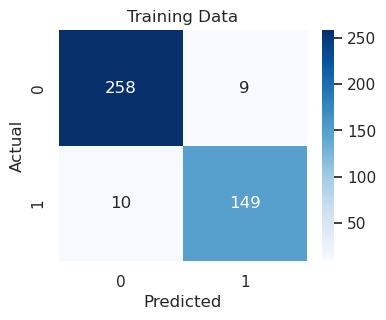

In [20]:
#confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True,fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.title('Training Data');

In [21]:
#Testing Report
y_proba_test = model_1.predict_proba(X_test_scaled)
y_pred_test = (y_proba_test[:,1]>=0.37599)
print(classification_report(y_test,y_pred_test,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        90
           1       0.98      1.00      0.99        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



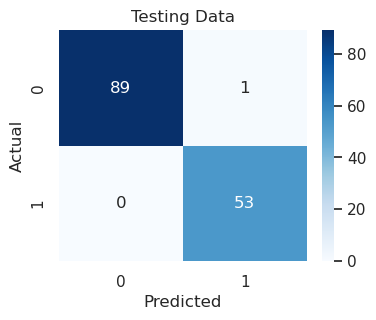

In [22]:
#confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.title('Testing Data');

In [23]:
#Precision-Recall Curve
precision1 , recall1 , threshold1 = precision_recall_curve(y_test,y_proba_test[:,1])
P_R_T1 = pd.DataFrame({'Threshold': threshold1, 'Precision': precision1[:-1], 'Recall': recall1[:-1]})
fig = px.line(P_R_T1, x='Recall', y='Precision', title='Precision-Recall Curve', width=700, height=500, hover_data=['Threshold'])
fig.show()

In [24]:
#ROC Curve
fpr1 , tpr1 ,thresholds1 = roc_curve(y_test,y_proba_test[:,1])
roc1 = pd.DataFrame({'FPR':fpr1,'TPR':tpr1,'Threshold':thresholds1})
fig = px.line(roc1, x="FPR",y="TPR",title='ROC Curve', width=700, height=500, hover_data=['Threshold'])
fig.show()

In [25]:
print('Testing ROC-AUC Score: ',roc_auc_score(y_test,y_proba_test[:,1]))

Testing ROC-AUC Score:  0.9985324947589099


# Logistic Regression (All Features)

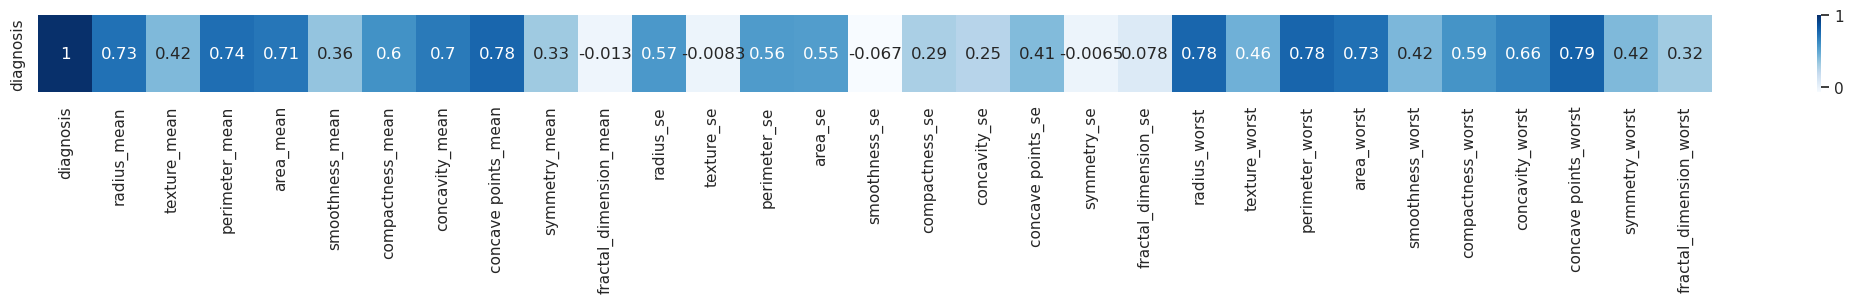

In [26]:
plt.figure(figsize=(27,1))
corr_target = df.corr()['diagnosis'].to_frame()
sns.heatmap(corr_target.T,annot=True,cmap='Blues');

<h2>Splitting and Scaling

In [27]:
# Data splitting
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']
X_train, X_test ,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)    

<h2>Hyperparameter Tuning


In [28]:
# Hyperparameter Tuning
# log_reg = LogisticRegression(random_state=42,max_iter=10000,solver='liblinear')
# param_grid = [
#     {
#     'penalty':['l1','l2'] ,
#     'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
#     }
# ]
# grid = GridSearchCV(log_reg,param_grid=param_grid,cv=5)
# grid.fit(X_train,y_train)
# grid.best_params_

<h2>Model Training

In [29]:
#Model Training
model_2 = LogisticRegression(random_state=42)  # Model Perform Better with No Regularization
model_2.fit(X_train_scaled,y_train) 

LogisticRegression(random_state=42)

<h2> Model Evaluation

In [30]:
#Training Report
y_proba_train = model_2.predict_proba(X_train_scaled)
y_pred_train = (y_proba_train[:,1]>=0.352)
print(classification_report(y_train,y_pred_train,zero_division=0))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       267
           1       0.97      0.98      0.97       159

    accuracy                           0.98       426
   macro avg       0.98      0.98      0.98       426
weighted avg       0.98      0.98      0.98       426



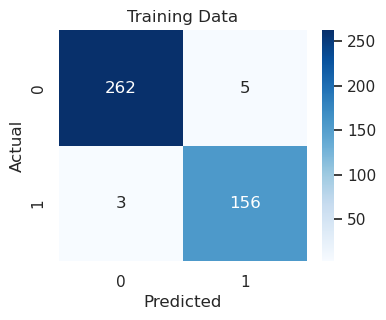

In [31]:
#confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True,fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.title('Training Data')
plt.show()

In [32]:
#Testing Report
y_proba_test = model_2.predict_proba(X_test_scaled)
y_pred_test = (y_proba_test[:,1]>=0.352)
print(classification_report(y_test,y_pred_test,zero_division=0))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        90
           1       0.98      0.96      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



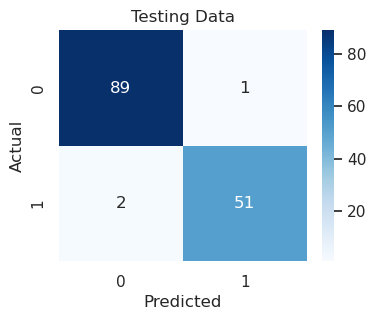

In [33]:
#confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.title('Testing Data')
plt.show()

In [34]:
#Precision-Recall Curve
precision2 , recall2 , threshold2 = precision_recall_curve(y_test,y_proba_test[:,1])
P_R_T2 = pd.DataFrame({'Threshold': threshold2, 'Precision': precision2[:-1], 'Recall': recall2[:-1]})
fig = px.line(P_R_T2, x='Recall', y='Precision', title='Precision-Recall Curve', width=700, height=500, hover_data=['Threshold'])
fig.show()

In [35]:
#ROC Curve
fpr2 , tpr2 ,thresholds2 = roc_curve(y_test,y_proba_test[:,1])
roc2 = pd.DataFrame({'FPR':fpr2,'TPR':tpr2,'Threshold':thresholds2})
fig = px.line(roc2, x="FPR",y="TPR",title='ROC Curve', width=700, height=500, hover_data=['Threshold'])
fig.show()

In [36]:
print('Testing ROC-AUC Score: ',roc_auc_score(y_test,y_proba_test[:,1]))

Testing ROC-AUC Score:  0.9962264150943396


# Models Comparison

In [37]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=fpr1, 
        y=tpr1, 
        mode='lines', 
        name='Model 1 (Feature Selection)', 
        line=dict(color='Red')
    )
)

fig.add_trace(
    go.Scatter(
        x=fpr2, 
        y=tpr2, 
        mode='lines', 
        name='Model 2 (All Features)', 
        line=dict(color='Blue')
    )
)
fig.update_layout(title='ROC Curves')
fig.show()